In [1]:
import pandas as pd
import numpy as np

In [4]:
import os
os.listdir('../data')
assert 'out_breed.csv' in os.listdir('../data') # this assert breaks if the data is configured uncorrectly

In [5]:
breeds = pd.read_csv('../data/out_breed.csv')
colors = pd.read_csv('../data/out_color.csv')
states = pd.read_csv('../data/out_state.csv')
train  = pd.read_csv('../data/out_train.csv')
test   = pd.read_csv('../data/out_test.csv')
sub    = pd.read_csv('../data/out_submission.csv')

In [6]:
from matplotlib import pyplot as plt

In [8]:
train.describe()

,Unnamed: 0,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,VideoAmt,PhotoAmt,AdoptionSpeed
count,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,...,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000
mean,7496.000000,1.457614,10.452078,265.272594,74.009738,1.776162,2.234176,3.222837,1.882012,1.862002,...,1.731208,1.558727,1.914227,1.036617,1.576069,21.259988,41346.028347,0.056760,3.889215,2.516441
std,4328.250628,0.498217,18.155790,60.056818,123.011575,0.681592,1.745225,2.742562,2.984086,0.547959,...,0.667649,0.695817,0.566172,0.199535,1.472477,78.414548,32.444153,0.346185,3.487810,1.177265
min,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,41324.000000,0.000000,0.000000,0.000000
25%,3748.000000,1.000000,2.000000,265.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,...,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,41326.000000,0.000000,2.000000,2.000000
50%,7496.000000,1.000000,3.000000,266.000000,0.000000,2.000000,2.000000,2.000000,0.000000,2.000000,...,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000,41326.000000,0.000000,3.000000,2.000000
75%,11244.000000,2.000000,12.000000,307.000000,179.000000,2.000000,3.000000,6.000000,5.000000,2.000000,...,2.000000,2.000000,2.000000,1.000000,1.000000,0.000000,41401.000000,0.000000,5.000000,4.000000
max,14992.000000,2.000000,255.000000,307.000000,307.000000,3.000000,7.000000,7.000000,7.000000,4.000000,...,3.000000,3.000000,3.000000,3.000000,20.000000,3000.000000,41415.000000,8.000000,30.000000,4.000000


<h2>Adoption Speed: TARGET EXPLORATION

In [18]:
"""
AdoptionSpeed
Contestants are required to predict this value. The value is determined by how quickly, if at all, a pet is adopted. The values are determined in the following way: 
0 - Pet was adopted on the same day as it was listed. 
1 - Pet was adopted between 1 and 7 days (1st week) after being listed. 
2 - Pet was adopted between 8 and 30 days (1st month) after being listed. 
3 - Pet was adopted between 31 and 90 days (2nd & 3rd month) after being listed. 
4 - No adoption after 100 days of being listed. (There are no pets in this dataset that waited between 90 and 100 days).
"""
pass

Text(0.5, 1.0, 'Total Adoption Speed by class')

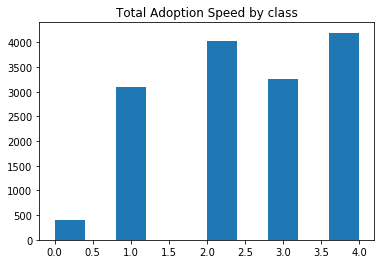

In [77]:
plt.hist(train['AdoptionSpeed'])
plt.title("Total Adoption Speed by class")

Text(0.5, 1.0, 'DOG Adoption Speed by class')

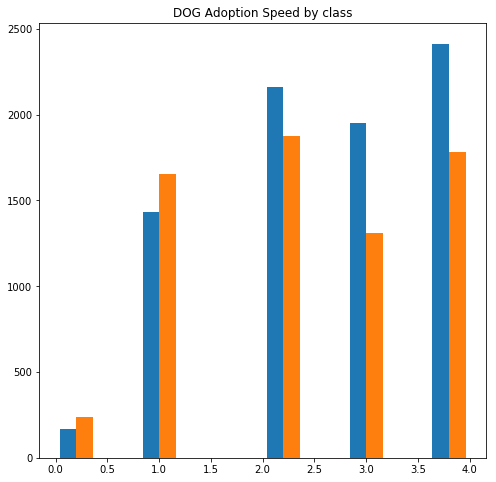

In [228]:
plt.figure(figsize=(8,8))
plt.hist([train[train['Type'] == 1]['AdoptionSpeed'], train[train['Type'] == 2]['AdoptionSpeed']] )
plt.title("DOG Adoption Speed by class")

In [32]:
asp_vc = train['AdoptionSpeed'].value_counts().sort_index()
asp_vc

0     410
1    3090
2    4037
3    3259
4    4197
Name: AdoptionSpeed, dtype: int64

they are similar, but what do exactly 0 1 2 3 4 mean in proportion

what is the probabilty that a pet will be adopted at day x?

In [19]:
asp = train['AdoptionSpeed']
len(asp)

14993

In [46]:
probability = []

In [47]:
"0 - Pet was adopted on the same day as it was listed."
days = 1
p = ((asp_vc[0]) / len(asp)) / days
probability.append([p]*days)
p # probabilty pet is adopted in first day

0.027346094844260656

In [48]:
"1 - Pet was adopted between 1 and 7 days (1st week) after being listed. "
days = 6
p = ((asp_vc[1]) / len(asp)) / days
probability.append([p]*days)
p # probabilty pet is adopted in day [1, 7]

0.034349363036083505

In [50]:
"2 - Pet was adopted between 8 and 30 days (1st month) after being listed. "
days = 30 - 8
p = ((asp_vc[2]) / len(asp)) / days
probability.append([p]*days)
p # probabilty pet is adopted in day [8, 30]

0.01223904488761422

In [52]:
"3 - Pet was adopted between 31 and 90 days (2nd & 3rd month) after being listed."
days = 90 - 31
p = ((asp_vc[3]) / len(asp)) / days
probability.append([p]*days)
p # probabilty pet is adopted in day [8, 30]

0.0036842051714528925

In [55]:
not_adopted_probabilty = ((asp_vc[4]) / len(asp))
not_adopted_probabilty

0.2799306342960048

In [60]:
from operator import __add__
from functools import reduce
probabilty = reduce(__add__, probability)

Text(0.5, 1.0, 'this is how the probabilty of getting adopted decreases over time')

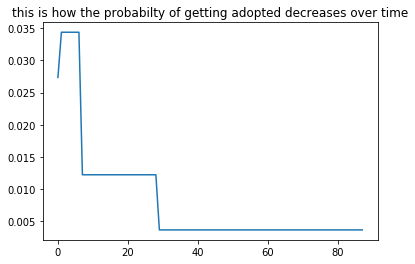

In [63]:
plt.plot(probabilty)
plt.title("this is how the probabilty of getting adopted decreases over time")

In [64]:
len(train)

14993

<h2>TRAIN/TEST EXPLORATION

In [69]:
len(train)

14993

In [68]:
len(test)

3948

(array([1871.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        2077.]),
 array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ]),
 <a list of 10 Patch objects>)

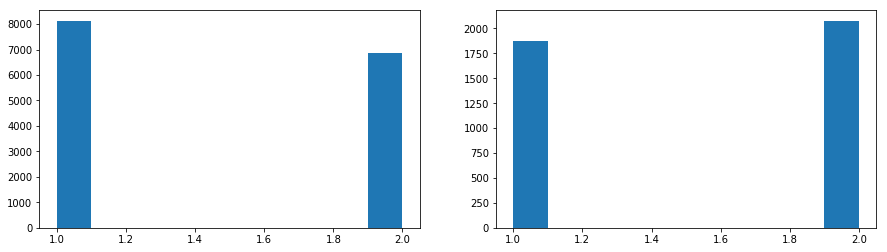

In [76]:
plt.figure(figsize=(15,4))
plt.subplot('121')
plt.hist(train['Type'])
plt.subplot('122')
plt.hist(test['Type'])

<h2>NAME

In [104]:
for i, n in enumerate(train['Name'][0:1000]): print(i,n)

0 Nibble
1 No Name Yet
2 Brisco
3 Miko
4 Hunter
5 nan
6 BULAT
7 Siu Pak & Her 6 Puppies
8 nan
9 Kitty
10 Bear
11 Kali
12 Peanut
13 2 Mths Old Cute Kitties
14 Lost Dog
15 Max
16 Brownie
17 Blackie
18 Beauty
19 nan
20 Godiva
21 Tigers
22 Kenit, Kenot, Techit, Keyad, Owen
23 Donut
24 Cikenet
25 Garfield
26 No Name
27 No Name
28 Hunter
29 Pepper
30 Benji & Kimi
31 Kekok
32 BoiBoi
33 nan
34 Kitten Girl Girl
35 Tom
36 nan
37 Comel
38 WHISKY
39 Boy
40 Angel
41 Drax Aka Fatso, Quill & Rocket
42 Novy
43 Jack
44 Xiao Gou
45 Blackie & Spotty
46 Cimpuk
47 Lollipop
48 Cute Puppies
49 Alang
50 Blackie Duo
51 Cedric Jones
52 BouncerBoy: Beagle Mix
53 Mummies
54 Dusty
55 Kitties
56 Hitler (rename-able)
57 Skippy
58 Ceasar
59 Chocolate And Kitten
60 Puss In Boots
61 Lego
62 Milky
63 IO-Male-03
64 Little Yelpers
65 Ding Ding
66 nan
67 Bill & Ben
68 Almond
69 Jasz
70 QiQi
71 H3
72 Baby / Bubbles
73 Ollie
74 9 Puppies For Adoption!
75 Coco
76 Pebbles & Pepper
77 Zoe
78 Z3
79 nan
80 MPSP-F-01
81 Teddy
82 T

759 MOTHER AND BABIES
760 Qitmir (white Male) & Cloe (female)
761 Mikio
762 Need Urgent Home..pls Adopt
763 Fiddy
764 Dollar
765 Julie
766 Lady Black
767 H6
768 Peanut
769 Kuroki (NAME IS UP TO YOU)
770 Tabby
771 Tom & Jerry
772 Han Ngus And Sister
773 Lady
774 Latte C
775 Puppies For Adoption
776 Ashley
777 Along
778 6 Precious Puppies
779 Zen-zen
780 Miles
781 Cute Stray Cats
782 Mocha
783 D4
784 nan
785 Buba & Ponx
786 Golden
787 Musang
788 nan
789 Meowzer
790 BLOSSOM
791 Stella
792 nan
793 Spot
794 Caspian
795 Kuro
796 For Adoption :)
797 Mimi
798 Molly 02
799 Gigi Si Comel
800 nan
801 Shy / Ruby
802 Multiple Puppies
803 Pok Leh Dan Mek Som
804 Strasky And Hutch
805 Curry
806 nan
807 Felix & Porridge
808 Cutie Sisters/bro
809 Mommy & 3 Kittens
810 Squirrel
811 Millie
812 Kuning
813 BrindleGirl- Black Labrador/Brindle Mix
814 Joey
815 Shark
816 Furbabies Anyone??
817 Pets + Strays: WhiteGingerLongHTail
818 Koko
819 Fei Mui
820 M'sia Day Kitty:Boyboy,YY & Girlgal
821 Brim
822 Puteh
8

In [103]:
train['Name'].isna().value_counts()

False    13736
True      1257
Name: Name, dtype: int64

In [109]:
(train['Name'] == "No Name").value_counts()

False    14939
True        54
Name: Name, dtype: int64

In [114]:
train['Name'].apply(lambda s: type(s)).value_counts()

<class 'str'>      13736
<class 'float'>     1257
Name: Name, dtype: int64

In [116]:
len(train['Name'].dropna())

13736

In [117]:
cn = train['Name'].dropna()

In [120]:
cn.apply(lambda s: 'Kitt' in s).value_counts()

False    12974
True       762
Name: Name, dtype: int64

In [132]:
# GENERIC NAMES KITTY
for i,n in enumerate(cn[cn.apply(lambda s: 'Kitt' in s)]): print (i, n)

0 Kitty
1 2 Mths Old Cute Kitties
2 Kitten Girl Girl
3 Kitties
4 Chocolate And Kitten
5 Ibu & Kitten Yg Diabaikan
6 MummyAndKitties
7 5 Cutie Kitty
8 2-3 Week Old Kittens
9 Kitten For Adoption
10 Kittens For Adoption
11 3 Female Kittens
12 Kitten S1
13 2 White Kittens And Calico Mama
14 Kitty 2
15 Kittens
16 Kitten
17 4 Cute Poor Kittens!!!
18 Kitten
19 Kitten
20 Sugarbun Kitten  @Damansara!!
21 :+: 2 Months Female Kitty For Adoption :
22 Pearl & Her Kitties
23 Lucky Kitten For Adoption
24 7 Cute Kittens For Free!
25 Black & White Kitten (LILA)
26 Cat & Kitten For Adoption
27 Mummy And Three Kittens
28 Panda Ears Kitty
29 White, Male Kitten For Adoption
30 ! Med Long Fur Kittens
31 Silver Domestic Short Hair Kittens
32 Mommy & 3 Kittens
33 M'sia Day Kitty:Boyboy,YY & Girlgal
34 Kitten For Adoption.
35 2 Lil Kitty
36 Shy Kittens
37 Bangsarian Kittens And Mummy Cat
38 Rescued Cats And Kitten
39 4 Cute Kittens!
40 âð» Black Kittens
41 Cute Gray Kitten For Adoption!
42 Kittens
43 4 Kit

In [122]:
cn.apply(lambda s: 'Pup' in s).value_counts()

False    13099
True       637
Name: Name, dtype: int64

In [134]:
# GENERIC NAMES PUPPIES
for i,n in enumerate(cn[cn.apply(lambda s: 'Pup' in s)]): print (i, n)

0 Siu Pak & Her 6 Puppies
1 Cute Puppies
2 9 Puppies For Adoption!
3 Mayo 2 Pups
4 Rottweiler Puppy
5 1 Month Old Puppies
6 Cute Female Puppies Looking A Home~
7 Pups For Adoption
8 3 Puppies -11wks Old Toilet Trained
9 Puppies
10 20 Little Puppies
11 2 Months Old Puppies
12 2 Female Puppies
13 Two Stray Puppies
14 Puppy
15 5 Adorable Pups
16 Pooch The Happy Pup
17 Puppy
18 Puppy 2
19 1 Adorable Puppy
20 Mixed Puppies
21 Cute Pups
22 Puppy
23 6 Fluffy Puppies
24 Female Puppy, 3 Months Old
25 7 Kajang Puppies <<3 Females Left>>
26 4 Female Puppies
27 Rescued Puppies
28 6 Puppies
29 Puppy!!
30 Male Puppy
31 Wanna Try Puppydum? Adopt 1!
32 Puppy
33 Puppy
34 Puppies For Adoption
35 6 Precious Puppies
36 Multiple Puppies
37 2 Female Puppies
38 6 Puppies
39 Adoption Puppies * URGENT *
40 3 Stray Boy Boy (male Pupps)
41 Pippy And Pups
42 Puppy Bruno
43 Puppy
44 Lucky Pups
45 Cute Puppies
46 Bella 4 Months Puppy!
47 Puppy
48 Puppy 4
49 Puppies
50 Puppy Super Mix
51 Stray Puppies
52 Happy Puppy

In [125]:
cn.apply(lambda s: any([c.isdigit() for c in s])).value_counts()

False    12474
True      1262
Name: Name, dtype: int64

In [135]:
# HAS NUMBER
for i,n in enumerate(cn[cn.apply(lambda s: any([c.isdigit() for c in s]))]): print (i, n)

0 Siu Pak & Her 6 Puppies
1 2 Mths Old Cute Kitties
2 IO-Male-03
3 H3
4 9 Puppies For Adoption!
5 Z3
6 MPSP-F-01
7 Mayo 2 Pups
8 Rocky 06
9 Doggie R4
10 KITTENS LITTER #2
11 5 Cutie Kitty
12 1 Month Old Puppies
13 2 Handsome Boys
14 PF 14928 -- Bobo
15 2-3 Week Old Kittens
16 3 Puppies -11wks Old Toilet Trained
17 Female - Unique Eye Colour (D133-060516)
18 Bijou *Sponsored* D6-250915
19 Y1
20 Name Them & Love Them 2
21 20 Little Puppies
22 3 Female Kittens
23 Kitten S1
24 2 Months Old Puppies
25 2 Female Puppies
26 18 Cats For NEED HOMES!!
27 H1
28 2 White Kittens And Calico Mama
29 Mama & Her 3 Babies
30 C7C
31 5 Adorable Pups
32 4 Musketeers
33 Kitty 2
34 D9
35 Bobby's 4 Babies
36 R11
37 Shadow 11
38 Puppy 2
39 1 Adorable Puppy
40 Y4
41 FY-M-B1
42 4 Cute Poor Kittens!!!
43 5 Mutts
44 6 Fluffy Puppies
45 Female Puppy, 3 Months Old
46 Z4
47 FY-F-B4
48 K-12 Auntie Moca
49 2F2M
50 B33
51 Anak Kucing Terbiar 02
52 :+: 2 Months Female Kitty For Adoption :
53 7 Kajang Puppies <<3 Females L

774 Name Them & Love Them 3
775 F7
776 Kitten 001
777 B1
778 Momo 2
779 5 Kittens
780 BT4
781 Brownie 1 And 2
782 4 Cats For Adoption
783 5 Dumped Pups
784 Orenji  ãªã¬ã³ã¸
785 D2
786 Vum  04
787 Obedient Girl D65(061215)
788 A2
789 2 Abandoned Puppies
790 1
791 3 Russian Blue Kittens With Mommy..
792 2weeks Old Puppy Female
793 Rare Chance 2 Weeks Old Kittens
794 K-25 Granddaddy - Carer Needed
795 Hazelnut & Her 2 Kittens
796 #1
797 Ruby - P41(110616) Vocalist
798 6 New Pups
799 1 Puppy For Adoption
800 2 Puppies
801 2 Kittens ( Husky & Miao )
802 3 Miao-miao
803 S4
804 Mama N 5 Kitties
805 Kitten 3
806 2
807 Zone F1 A2
808 Kuning2
809 Adult Cat(1year) And 2 Kittens(2-3mnths)
810 Puppies For Adoption (6 Of Them)
811 6 Puppies
812 A88
813 P15(230916)
814 A3
815 2 Cute Mix Breed Cats
816 3 Abandoned Kittens
817 Puppy 1
818 C1C
819 Looking For Good Home For 8 Kitties
820 11 Kittens
821 2 Abadoned Kittens
822 251(081016)
823 4 Kittens
824 PUPPY R3
825 Jimmy åç±³
826 Kitten RA16
827 

In [131]:
cn.apply(lambda s: s.isupper() and any([c.isdigit() for c in s])).value_counts()

False    13501
True       235
Name: Name, dtype: int64

In [136]:
# CODE NAME
for i,n in enumerate(cn[cn.apply(lambda s: s.isupper() and any([c.isdigit() for c in s]))]): print (i, n)

0 H3
1 Z3
2 MPSP-F-01
3 KITTENS LITTER #2
4 Y1
5 H1
6 C7C
7 D9
8 R11
9 Y4
10 FY-M-B1
11 Z4
12 FY-F-B4
13 2F2M
14 B33
15 M2
16 H6
17 D4
18 D253(180217)
19 D192(170416)
20 F1
21 W7
22 CK-F-04
23 C2C
24 D13(070216)
25 L17
26 D98(280516)
27 C5C
28 1F
29 Q1
30 RO-F-01
31 3F
32 6 CUTE KITTENS
33 G1
34 AB1
35 JY-M-02
36 D57(040317)
37 B3
38 PJ 17
39 F6
40 A5
41 PUPPY R5
42 BT8
43 P51(051116)
44 D5
45 OREN (MOM) + 4 KITTENS
46 A4
47 Q4
48 3 QQ PRINCESS
49 D198(250415)
50 JY-M-01
51 Y7
52 R12
53 D233(271016)
54 W6
55 THE FAB-5
56 A3
57 R10
58 A1
59 JY-F-01
60 T1
61 J1010
62 W1
63 M4
64 P5
65 H2
66 Y6
67 CNY5
68 D226(271116)
69 D7
70 B4
71 AB2
72 C2
73 3 PUPPIES FOR ADOPTION
74 M8
75 KITTEN FOR ADOPT (FREE) 2
76 G2
77 CNY3
78 C3C
79 4 PUPPIES FOR ADOPTION
80 BT3
81 BT6
82 F10
83 F2
84 MPSP-F-02
85 D184(070214)
86 PF14804
87 W8
88 W4
89 C1
90 W2
91 RO-F-04
92 B1
93 Y5
94 F5
95 BT5
96 C6C
97 Y0
98 B2
99 D64(050317)
100 CNY2
101 Q6
102 B4
103 BT1
104 G3
105 CNY1
106 S1
107 R9
108 W3
109 C14
110 R7


In [182]:
scoring = {0:1,1:0.8,2:0.6,3:0.2,4:0}
train['score'] = train['AdoptionSpeed'].map(scoring)

In [183]:
grouped_sums = dict(train.groupby(train.Name).score.sum())

In [184]:
grouped_sums['No Name']

22.000000000000004

In [181]:
for name in list(train['Name'].value_counts()[:100].index):
    print(name)
    print(train[train['Name'] == name]['AdoptionSpeed'].value_counts().sort_index())

Baby
0     2
1    11
2    15
3    11
4    27
Name: AdoptionSpeed, dtype: int64
Lucky
0     5
1    14
2    16
3    12
4    17
Name: AdoptionSpeed, dtype: int64
No Name
0     3
1    14
2    11
3     6
4    20
Name: AdoptionSpeed, dtype: int64
Brownie
0     1
1    11
2    14
3    12
4    16
Name: AdoptionSpeed, dtype: int64
Mimi
0     3
1    12
2    13
3     7
4    17
Name: AdoptionSpeed, dtype: int64
Blackie
0     1
1    12
2    15
3     9
4    12
Name: AdoptionSpeed, dtype: int64
Puppy
0     1
1     7
2     7
3    11
4    19
Name: AdoptionSpeed, dtype: int64
Kitty
0     1
1    13
2     8
3     8
4     9
Name: AdoptionSpeed, dtype: int64
Max
1     9
2    10
3     9
4    11
Name: AdoptionSpeed, dtype: int64
Kittens
1     8
2    13
3     5
4    13
Name: AdoptionSpeed, dtype: int64
Oreo
1     6
2    13
3     6
4    11
Name: AdoptionSpeed, dtype: int64
Coco
0     2
1     4
2    12
3     5
4    12
Name: AdoptionSpeed, dtype: int64
Tiger
0     2
1     5
2    13
3     5
4     9
Name: AdoptionSp

In [185]:
for name in list(train['Name'].value_counts()[:100].index):
    print(("%s, %.2f") % (name, grouped_sums[name]))

Baby, 22.00
Lucky, 28.20
No Name, 22.00
Brownie, 20.60
Mimi, 21.80
Blackie, 21.40
Puppy, 13.00
Kitty, 17.80
Max, 15.00
Kittens, 15.20
Oreo, 13.80
Coco, 13.40
Tiger, 14.80
Angel, 12.20
Milo, 17.20
Snowy, 14.40
Bobby, 12.40
Kiki, 10.00
Lucy, 7.60
Lily, 9.20
Tom, 6.40
Ginger, 10.20
Puppies, 11.40
Happy, 8.40
Prince, 10.40
Daisy, 10.20
Bella, 8.40
Rocky, 11.60
Simba, 8.40
Lola, 10.40
Kitten, 9.80
Momo, 9.20
Molly, 9.40
Luna, 9.40
Princess, 6.20
No Name Yet, 11.20
Tommy, 8.80
Panda, 6.40
Fluffy, 10.00
Buddy, 7.40
Snow, 8.40
Peanut, 7.60
Cookie, 7.00
Bobo, 7.80
Toby, 7.20
Mickey, 8.80
Blacky, 6.40
Shadow, 7.00
Oyen, 5.00
Leo, 7.60
Bailey, 5.20
Lulu, 6.00
Coffee, 9.20
Minnie, 6.00
Teddy, 9.80
Boy, 7.80
Jojo, 7.80
Cutie, 7.80
Pepper, 4.60
Putih, 8.00
Mocha, 3.20
Milky, 5.00
Unknown, 7.00
Girl, 4.40
Jack, 4.60
Goldie, 6.40
Grey, 7.40
Whitey, 7.00
Oren, 5.60
Snoopy, 7.40
Candy, 5.20
Phoebe, 5.40
Sunny, 4.60
Tiny, 6.40
Spotty, 2.60
Sam, 4.40
Dolly, 4.20
Beauty, 6.80
Patches, 6.40
Sophie, 4.20
Bam

In [186]:
train['Name'].value_counts()[:100]

Baby                    66
Lucky                   64
No Name                 54
Brownie                 54
Mimi                    52
Blackie                 49
Puppy                   45
Kitty                   39
Max                     39
Kittens                 39
Oreo                    36
Coco                    35
Tiger                   34
Angel                   33
Milo                    32
Snowy                   30
Bobby                   30
Kiki                    29
Lucy                    29
Lily                    28
Tom                     27
Ginger                  26
Puppies                 26
Happy                   25
Prince                  25
Daisy                   24
Bella                   23
Rocky                   23
Simba                   23
Lola                    23
                        ..
Candy                   13
Phoebe                  13
Sunny                   12
Tiny                    12
Spotty                  12
Sam                     12
D

In [190]:
for n in train['Name'].value_counts()[-1000:].index: print(n)

Urgent Adoption - Kittens
Trish
Siri
GreyBaron & TobyTabby
Puppies Looking For Good Homes
GIGI And XIAO HEI
Peanut, Pepper, Ginger, & Milo
KITTEN FOR ADOPT (FREE) 2
Ethio
Cutiepie
BELANG THE KITTEN
Saga
Beeble
Kitten RR1
Lucy & Luna
KEIGHT
Olat
Si Kental & Si Manja *Urgent*
Frosty Aka Lar Char Mao
Shiny
Harper
Ibu Dan 4 Anak
Shy Kittens
Ponky
Kacha
Mix Gender Puppies
ç³¯ç±³å¦¹
GoGo
BlackJack
TWO KITTENS
3Kitties_JB Area
Miao Mi
Poison
Sparkles
Glorious
â¥ Viserys â¥
Ah Choy
Unique
Kookie, Haha, Mongji
Ken-Ken
Padi
( By Anna)
Missy And Mimi
Prince  Pitb
ALMOND
Tallulah And Tigerlily
4 Kittens Need Foster
Water
Squeeshi
Prosperity Kitty (PK)
Teabag
No Name Yet, It's Up To The Owner
Ajiz
Pendekar
Urgent Adoption - Male Kitten
G.retriever Found,bkt Tinggi,klang
Black Beauties
Kittens (2 Months Old)
D5
No Names
Doo Doo
Darsh
Mrs. Lim Puppy
Yellow Kitten
Muffin & Cookie (Neutered)
Pepper(pots)
Super Girl
Tto Tto
Sheena
CNY3
Popcorn
Sheldon Aka Shelly
Anak Kucing Terbiar 04
Prime
Billie
Dai

In [209]:
average_distribution = (train['AdoptionSpeed'].value_counts() / len(train)).sort_index()
average_distribution

0    0.027346
1    0.206096
2    0.269259
3    0.217368
4    0.279931
Name: AdoptionSpeed, dtype: float64

In [202]:
unnamed = train[train['Name'].apply(lambda n: isinstance(n, float) or n == "No Name")]

In [210]:
unnamed_distribution = (unnamed['AdoptionSpeed'].value_counts() / len(unnamed)).sort_index()
unnamed_distribution

0    0.022121
1    0.217391
2    0.246377
3    0.169336
4    0.344775
Name: AdoptionSpeed, dtype: float64

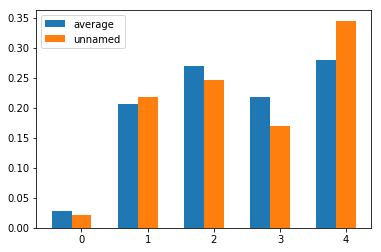

In [231]:
size = 0.3
plt.bar([i - size for i in range(len(average_distribution))], average_distribution, width=size, label='average')
plt.bar(range(len(average_distribution)), unnamed_distribution, width=size, label='unnamed')
plt.legend()